In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# makes figures look better in Jupyter
sns.set_context("talk")

In [2]:
import sys 
from pathlib import Path 
sys.path.insert(0, str(Path.cwd().parents[1]) + "/omniplate_platereader_analysis_code")

In [3]:
import omniplate as om

In [4]:
p= om.platereader(wdir= '../../../../data/raw_platereader/promoter_terminator_swaps/mTurq_collection/')


omniplate version= 0.15
Working directory is /home/dimmest-p/Documents/PhD/3UTR_motifs/motifPrediction/chimera_project_manuscript/raw_data_analysis/code/raw_platereader_analysis/promoter_terminator_swaps/pro-mTurq-ter_swaps_pr/../../../../data/raw_platereader/promoter_terminator_swaps/mTurq_collection/
Files available are: 
---
20201205-Pro-ter_mTurq2-collection_n6.xlsx
20201110-Pro-ter_mTurq2-collection_n1_s.json
20201110-Pro-ter_mTurq2-collection_n1_r.json
20201202-Pro-ter_mTurq2-collection_n4.xlsx
ODcorrection_Glucose_Haploid.txt
20201126-Pro-ter_mTurq2-collection_n3.xlsx
20201204-Pro-ter_mTurq2-collection_n5.xlsx
20201112-pro-ter_mTurq_contents.xls
20201122-Pro-ter_mTurq2-collection_n2.xlsx
20201110-Pro-ter_mTurq2-collection_n1.xlsx
20201110-Pro-ter_mTurq2-collection_n1.log
20201110-Pro-ter_mTurq2-collection_n1_sc.json


In [5]:
p.load(dnames = ['20201110-Pro-ter_mTurq2-collection_n1.xlsx', '20201122-Pro-ter_mTurq2-collection_n2.xlsx'], anames = ['20201112-pro-ter_mTurq_contents.xls','20201112-pro-ter_mTurq_contents.xls'])

loading 20201110-Pro-ter_mTurq2-collection_n1.xlsx
loading 20201122-Pro-ter_mTurq2-collection_n2.xlsx

Experiment: 20201110-Pro-ter_mTurq2-collection_n1 
---
Conditions:
	 SC-URA
Strains:
	 POT1-ccdB
	 null
	 pCLN2-mTurq-tCLN2
	 pCLN2-mTurq-tHSP26
	 pCLN2-mTurq-tPAB1
	 pCLN2-mTurq-tPGK1
	 pCLN2-mTurq-tPMA1_long
	 pCLN2-mTurq-tRPS13
	 pCLN2-mTurq-tRPS3
	 pCLN2-mTurq-tSRO9_long
	 pCLN2-mTurq-tSUN4
	 pCLN2-mTurq-tTOS6
	 pHSP26-mTurq-tCLN2
	 pHSP26-mTurq-tHSP26
	 pHSP26-mTurq-tPAB1
	 pHSP26-mTurq-tPGK1
	 pHSP26-mTurq-tPMA1_long
	 pHSP26-mTurq-tRPS13
	 pHSP26-mTurq-tRPS3
	 pHSP26-mTurq-tSRO9_long
	 pHSP26-mTurq-tSUN4
	 pHSP26-mTurq-tTOS6
	 pPGK1-mTurq-tCLN2
	 pPGK1-mTurq-tHSP26
	 pPGK1-mTurq-tPAB1
	 pPGK1-mTurq-tPGK1
	 pPGK1-mTurq-tPMA1_long
	 pPGK1-mTurq-tRPS13
	 pPGK1-mTurq-tRPS3
	 pPGK1-mTurq-tSRO9_long
	 pPGK1-mTurq-tSUN4
	 pPGK1-mTurq-tTOS6
	 pRPS13-mTurq-tCLN2
	 pRPS13-mTurq-tHSP26
	 pRPS13-mTurq-tPAB1
	 pRPS13-mTurq-tPGK1
	 pRPS13-mTurq-tPMA1_long
	 pRPS13-mTurq-tRPS13
	 pRPS13-mTurq

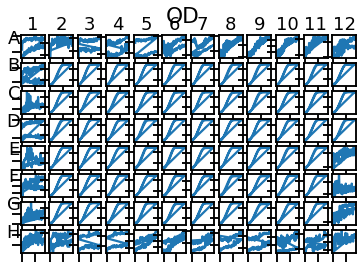

In [6]:
p.plot(y= 'OD', plate= True, experiment = "20201110-Pro-ter_mTurq2-collection_n1")

In [23]:
p.plot(y= 'mTurq-60', plate= True, strain = "pCLN2-mTurq-tCLN2")

Object `p.plot(y= 'mTurq-60', plate= True, strain = "pCLN2-mTurq-tCLN2")` not found.


20201110-Pro-ter_mTurq2-collection_n1 :: Correcting for media for OD in SC-URA
GP Warning: large data set - 2640 datapoints - may slow optimisation and give memory issues
20201122-Pro-ter_mTurq2-collection_n2 :: Correcting for media for OD in SC-URA
GP Warning: large data set - 2640 datapoints - may slow optimisation and give memory issues
Fitting dilution data for OD correction for non-linearities
Using ../../../../data/raw_platereader/promoter_terminator_swaps/mTurq_collection/ODcorrection_Glucose_Haploid.txt


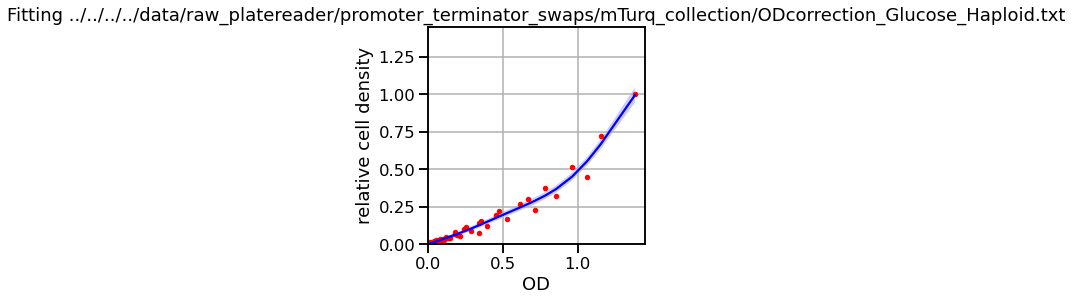

In [8]:
p.correctOD()

In [9]:
p.getstats(figs=False)


Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: POT1-ccdB in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 4.002372e+02
hparam[0]= 2.101099e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.076381e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.604442e-03 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.547883e-01 +/- 9.493907e-03 [9.493907e-04]
 time of max gr= 3.091403e+00 +/- 2.856438e-01 [2.856438e-02]
  doubling time= 1.955083e+00 +/- 5.200606e-02 [5.200606e-03]
         max OD= 6.813201e-01 +/- 5.004970e-03 [5.004970e-04]
       lag time= 1.036852e+00 +/- 7.451323e-02 [7.451323e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1

log(max likelihood)= 3.019746e+02
hparam[0]= 1.985778e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.107631e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.558265e-01 +/- 3.207680e-03 [3.207680e-04]
 time of max gr= 3.076584e+00 +/- 1.510762e-01 [1.510762e-02]
  doubling time= 1.948150e+00 +/- 1.754613e-02 [1.754613e-03]
         max OD= 6.760493e-01 +/- 1.200094e-03 [1.200094e-04]
       lag time= 9.896387e-01 +/- 2.210230e-02 [2.210230e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pCLN2-mTurq-tSUN4 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.909941e+02
hparam[0]= 


Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pHSP26-mTurq-tRPS3 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.001624e+02
hparam[0]= 3.037775e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.202315e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.542714e-01 +/- 2.706156e-03 [2.706156e-04]
 time of max gr= 2.822500e+00 +/- 2.075766e-01 [2.075766e-02]
  doubling time= 1.956657e+00 +/- 1.494447e-02 [1.494447e-03]
         max OD= 7.082116e-01 +/- 1.115577e-03 [1.115577e-04]
       lag time= 7.986784e-01 +/- 1.776081e-02 [1.776081e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-coll

log(max likelihood)= 3.046354e+02
hparam[0]= 5.333981e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.357199e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.575070e-01 +/- 3.222909e-03 [3.222909e-04]
 time of max gr= 2.629821e+00 +/- 2.163017e-01 [2.163017e-02]
  doubling time= 1.938993e+00 +/- 1.747155e-02 [1.747155e-03]
         max OD= 7.091667e-01 +/- 9.550605e-04 [9.550605e-05]
       lag time= 7.237871e-01 +/- 1.860467e-02 [1.860467e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pPGK1-mTurq-tRPS13 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.008796e+02
hparam[0]=


Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pRPS13-mTurq-tPGK1 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.016914e+02
hparam[0]= 2.394322e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.055504e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.571169e-01 +/- 3.561417e-03 [3.561417e-04]
 time of max gr= 3.127400e+00 +/- 1.462498e-01 [1.462498e-02]
  doubling time= 1.941146e+00 +/- 1.929032e-02 [1.929032e-03]
         max OD= 6.425764e-01 +/- 8.495437e-04 [8.495437e-05]
       lag time= 7.933298e-01 +/- 2.475653e-02 [2.475653e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-coll

log(max likelihood)= 3.056089e+02
hparam[0]= 3.938801e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.145967e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.741573e-01 +/- 3.759550e-03 [3.759550e-04]
 time of max gr= 2.830970e+00 +/- 2.152113e-01 [2.152113e-02]
  doubling time= 1.852742e+00 +/- 1.856848e-02 [1.856848e-03]
         max OD= 6.934617e-01 +/- 1.235777e-03 [1.235777e-04]
       lag time= 9.529444e-01 +/- 2.127076e-02 [2.127076e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pRPS3-mTurq-tPAB1 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.840648e+02
hparam[0]= 


Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pSRO9-mTurq-tCLN2 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.841773e+02
hparam[0]= 9.282336e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.123490e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.782897e-01 +/- 3.699835e-03 [3.699835e-04]
 time of max gr= 3.004593e+00 +/- 2.067965e-01 [2.067965e-02]
  doubling time= 1.832493e+00 +/- 1.789873e-02 [1.789873e-03]
         max OD= 6.768644e-01 +/- 1.090460e-03 [1.090460e-04]
       lag time= 1.003816e+00 +/- 2.154070e-02 [2.154070e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-colle

log(max likelihood)= 3.049135e+02
hparam[0]= 6.459723e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.624933e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.558279e-01 +/- 2.682100e-03 [2.682100e-04]
 time of max gr= 3.101991e+00 +/- 1.622911e-01 [1.622911e-02]
  doubling time= 1.948095e+00 +/- 1.468967e-02 [1.468967e-03]
         max OD= 6.853785e-01 +/- 1.094167e-03 [1.094167e-04]
       lag time= 8.616695e-01 +/- 1.867481e-02 [1.867481e-03]

Fitting OD for 20201110-Pro-ter_mTurq2-collection_n1:: pSRO9-mTurq-tTOS6 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.864474e+02
hparam[0]= 


Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pCLN2-mTurq-tRPS3 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.059961e+02
hparam[0]= 8.889728e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.530646e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 4.020200e-01 +/- 3.156043e-03 [3.156043e-04]
 time of max gr= 2.797363e+00 +/- 1.828863e-01 [1.828863e-02]
  doubling time= 1.724267e+00 +/- 1.349438e-02 [1.349438e-03]
         max OD= 6.779899e-01 +/- 9.735011e-04 [9.735011e-05]
       lag time= 4.543283e-01 +/- 1.991571e-02 [1.991571e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-colle

log(max likelihood)= 3.028966e+02
hparam[0]= 2.914333e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.190501e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 3.942604e-01 +/- 3.234456e-03 [3.234456e-04]
 time of max gr= 3.311930e+00 +/- 2.585130e-01 [2.585130e-02]
  doubling time= 1.758213e+00 +/- 1.441333e-02 [1.441333e-03]
         max OD= 6.453710e-01 +/- 9.304525e-04 [9.304525e-05]
       lag time= 6.448548e-01 +/- 2.143910e-02 [2.143910e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pHSP26-mTurq-tRPS13 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.033215e+02
hparam[0]


Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pPGK1-mTurq-tPGK1 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.042779e+02
hparam[0]= 3.590779e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.198065e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 4.249739e-01 +/- 3.389953e-03 [3.389953e-04]
 time of max gr= 3.017591e+00 +/- 1.806148e-01 [1.806148e-02]
  doubling time= 1.631138e+00 +/- 1.301836e-02 [1.301836e-03]
         max OD= 6.937279e-01 +/- 1.037518e-03 [1.037518e-04]
       lag time= 5.932713e-01 +/- 1.920461e-02 [1.920461e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-colle

log(max likelihood)= 3.094280e+02
hparam[0]= 5.955390e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.533855e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 4.088941e-01 +/- 2.538572e-03 [2.538572e-04]
 time of max gr= 2.693604e+00 +/- 2.076508e-01 [2.076508e-02]
  doubling time= 1.695240e+00 +/- 1.051628e-02 [1.051628e-03]
         max OD= 6.804981e-01 +/- 1.091657e-03 [1.091657e-04]
       lag time= 4.047301e-01 +/- 1.524773e-02 [1.524773e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pRPS13-mTurq-tPAB1 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 2.920891e+02
hparam[0]=


Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pRPS3-mTurq-tCLN2 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.090656e+02
hparam[0]= 4.570995e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.425155e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 4.067627e-01 +/- 3.591741e-03 [3.591741e-04]
 time of max gr= 2.483966e+00 +/- 1.866673e-01 [1.866673e-02]
  doubling time= 1.704191e+00 +/- 1.505182e-02 [1.505182e-03]
         max OD= 6.777110e-01 +/- 9.062245e-04 [9.062245e-05]
       lag time= 4.476042e-01 +/- 1.942445e-02 [1.942445e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-colle

log(max likelihood)= 3.062627e+02
hparam[0]= 1.703142e+01 [1.000000e-05, 1.000000e+05]
hparam[1]= 2.002165e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 4.019135e-01 +/- 3.035742e-03 [3.035742e-04]
 time of max gr= 2.858773e+00 +/- 1.322463e-01 [1.322463e-02]
  doubling time= 1.724716e+00 +/- 1.299316e-02 [1.299316e-03]
         max OD= 6.663854e-01 +/- 8.867520e-04 [8.867520e-05]
       lag time= 4.961534e-01 +/- 1.762597e-02 [1.762597e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pRPS3-mTurq-tTOS6 in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.090697e+02
hparam[0]= 


Fitting OD for 20201122-Pro-ter_mTurq2-collection_n2:: pSRO9-mTurq-tSRO9_long in SC-URA
Taking natural logarithm of the data.
Fitting measurement errors.
Using a (twice differentiable) Matern covariance function.
hparam[0] determines the amplitude of variation
hparam[1] determines the stiffness
hparam[2] determines the variance of the measurement error
log(max likelihood)= 3.006490e+02
hparam[0]= 3.122931e+00 [1.000000e-05, 1.000000e+05]
hparam[1]= 1.166518e+01 [1.000000e-04, 1.000000e+04]
hparam[2]= 1.000000e-05 [1.000000e-05, 1.000000e+02]

Calculating statistics with 100 samples
	(displaying mean +/- standard deviation [standard error])

         max gr= 4.042239e-01 +/- 3.270754e-03 [3.270754e-04]
 time of max gr= 2.771952e+00 +/- 1.722812e-01 [1.722812e-02]
  doubling time= 1.714872e+00 +/- 1.385031e-02 [1.385031e-03]
         max OD= 6.756037e-01 +/- 1.000542e-03 [1.000542e-04]
       lag time= 4.724031e-01 +/- 1.962209e-02 [1.962209e-03]

Fitting OD for 20201122-Pro-ter_mTurq2-

In [10]:
p.sc[['experiment','strain', 'max gr', 'max gr var']].head()

,experiment,strain,max gr,max gr var
0,20201110-Pro-ter_mTurq2-collection_n1,POT1-ccdB,0.354788,0.000090
1,20201110-Pro-ter_mTurq2-collection_n1,null,NaN,NaN
2,20201110-Pro-ter_mTurq2-collection_n1,pCLN2-mTurq-tCLN2,0.373591,0.000021
3,20201110-Pro-ter_mTurq2-collection_n1,pCLN2-mTurq-tHSP26,0.377732,0.000012
4,20201110-Pro-ter_mTurq2-collection_n1,pCLN2-mTurq-tPAB1,0.371004,0.000012


/home/dimmest-p/Documents/PhD/3UTR_motifs/motifPrediction/chimera_project_manuscript/raw_data_analysis/code/raw_platereader_analysis/omniplate_platereader_analysis_code/omniplate.py:1028: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append([dfp, dfm])
/home/dimmest-p/miniconda3/envs/platereader-analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dimmest-p/miniconda3/envs/platereader-analysis/lib/python3.8/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

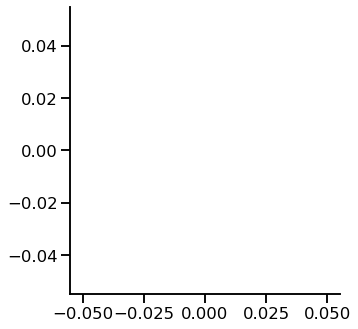

In [35]:
p.plot(y= 'c-mTurq-60perod')

Using POT1-ccdB as the reference
Correcting autofluorescence
20201110-Pro-ter_mTurq2-collection_n1:: Processing reference strain POT1-ccdB for mTurq-60 in SC-URA


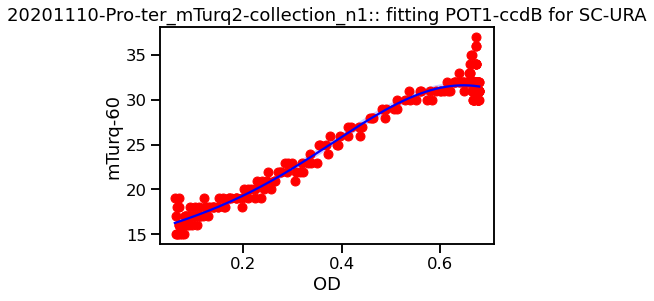

20201122-Pro-ter_mTurq2-collection_n2:: Processing reference strain POT1-ccdB for mTurq-60 in SC-URA


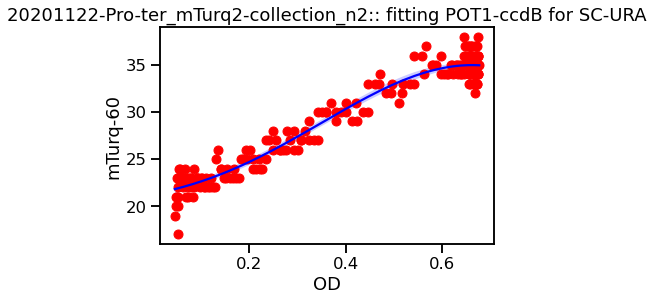

In [12]:
p.correctauto(['mTurq-60'], refstrain= 'POT1-ccdB')

In [13]:
experiments= ['20201110-Pro-ter_mTurq2-collection_n1', '20201122-Pro-ter_mTurq2-collection_n2']
# store results as an array of dictionaries to eventually convert into a dataframe
results= []
for e in experiments:
    for s in p.allstrains[e]:
        # find the time of local maximum growth rate for the condition
        tm= p.sc.query('strain == @s & experiment == @e')['time of local max gr'].values[0]
        # take the relevant sub-dataframe for the condition
        df= p.s.query('strain == @s & experiment == @e')
        # find GPF mean at time tm
        i= np.argmin(np.abs(df['time'].values - tm))
        results.append({'c-mTurq-60 per OD at max local gr' : df['c-mTurq-60perod'][df.index[i]],
                     'strain' : s, 'experiment' : e})
# convert to dataframe
rdf= pd.DataFrame(results)
# add to existing dataframe by experiment, condition, and strain
p.sc= pd.merge(p.sc, rdf, how= 'outer')

In [19]:
p.s.query('strain == "pCLN2-mTurq-tCLN2" & experiment == "20201110-Pro-ter_mTurq2-collection_n1"')['time of local max gr'].values[0]

3.0850510185185183

In [53]:
p.r.query('strain == "pCLN2-mTurq-tCLN2" & experiment == "20201110-Pro-ter_mTurq2-collection_n1"')

,experiment,condition,strain,time,well,OD,mTurq-80,mTurq-60
720,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,0.000000,B2,0.057208,152.0,21.0
721,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,0.211806,B2,0.059838,159.0,20.0
722,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,0.423556,B2,0.060993,157.0,17.0
723,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,0.635287,B2,0.061277,156.0,18.0
724,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,0.847028,B2,0.062583,157.0,17.0
...,...,...,...,...,...,...,...,...
795,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,15.880157,B2,0.699408,896.0,107.0
796,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,16.091889,B2,0.698981,897.0,107.0
797,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,16.303630,B2,0.699658,896.0,107.0
798,20201110-Pro-ter_mTurq2-collection_n1,SC-URA,pCLN2-mTurq-tCLN2,16.515361,B2,0.700335,903.0,108.0


/home/dimmest-p/miniconda3/envs/platereader-analysis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'matplotlib' is not defined

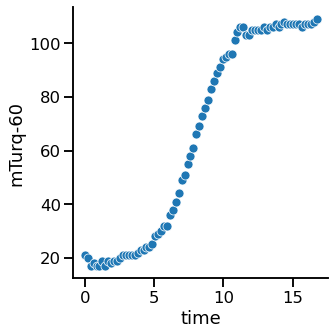

In [60]:
sns.relplot("time", "mTurq-60", data= p.r.query('strain == "pCLN2-mTurq-tCLN2" & experiment == "20201110-Pro-ter_mTurq2-collection_n1"'))
matplotlib.pyplot.xvline(2.8, 0,0.17)


In [37]:
help(p.plot)

Help on method plot in module omniplate:

plot(x='time', y='OD', by='well', hue=None, style=None, kind='line', size=None, col=None, row=None, height=5, aspect=1, ymin=False, onefig=False, title=False, plate=False, nonull=False, messages=False, experiments='all', conditions='all', strains='all', experimentincludes=False, experimentexcludes=False, conditionincludes=False, conditionexcludes=False, strainincludes=False, strainexcludes=False, **kwargs) method of omniplate.platereader instance
    Plots from the underlying dataframes (chosen automatically) using Seaborn's relplot
    
    https://seaborn.pydata.org/generated/seaborn.relplot.html
    
    Arguments
    --
    x: variable for x-axis (default: 'time')
    y: variable for y-axis (default: 'OD')
    by: show data for each instance of this variable (either 'well' - default, 'experiment', 'condition', or 'strain')
    hue: (Seaborn) variable that determines the color of each line
    style: (Seaborn) variable that determines the st

In [ ]:
pd.DataFrame(results).to_csv("pro-mTurq-ter_swaps_n1_n2.csv")

In [ ]:
?p.sc.query

In [ ]:
p.sc.query('strain == \'POT1-ccdB\' & experiment == \'20201110-Pro-ter_mTurq2-collection_n1\'')['time of local max gr'].values[0]

In [ ]:
p.s.query('strain == \'POT1-ccdB\' & experiment == \'20201110-Pro-ter_mTurq2-collection_n1\'')['time'].values

In [ ]:
p.sc